## ОПИСАНИЕ ИССЛЕДОВАНИЯ 

По предоставленным данным необходимо спрогнозировать степень удовлетворенности сотрудников по предоставленным данным, где удовлетворенность измеряется от 0 (совершенно неудовлетворен) до 1 (полностью удовлетворен), а также по предоставленным данным спрогнозировать увольнение сотрудника. 

Для решения первой задачи необходимо пройти будет следующие этапы: 
1. Загрузить данные 
2. Произвести предобработку данных, проверить на дубликаты, явные и неявные, проверить все типы данных в таблицах
3. Провести исследовательский анализ, по количественным построить гистограммы распределения, ящик с усами для проверки выбросов, привести при необходимости в порядок. Для категориальных переменных необходимо построить графики типа pie  или bar для из распределения 
4. Сделать корреляционный анализ, для проверки наличия мультиколлинеарности. 
5. Совершить подготовку данных, для количественных признаков - масштабирование, для категориальных признаков - кодирование. Использовать пайплайн 
6. Обучить как минимум 2 модели, например, линейную модель и дерево решений, подобрать гиперпараметры. 
7. Выбрать лучшую модель и проверить ее качество на метрике SMAPE, метрику нужно ввести самостоятельно. Критерий успеха: SMAPE ≤ 15 на тестовой выборке.
8. оформить выводы

Для решения второй задачи этапы: 
1. Загрузить данные 
2. Произвести предобработку данных, проверить на дубликаты, явные и неявные, проверить все типы данных в таблицах
3. Провести исследовательский анализ, по количественным построить гистограммы распределения, ящик с усами для проверки выбросов, привести при необходимости в порядок. Для категориальных переменных необходимо построить графики типа pie  или bar для из распределения. Составить портрет уволившегося сотрудника. Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. 
4. Добавить новый входной признак. 
5. Совершить подготовку данных, для количественных признаков - масштабирование, для категориальных признаков - кодирование. Использовать пайплайн
6. Произвести обучение модели, использовать минимум 3. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.
7. Выводы 

После чего сформирвоать общие выводы по системе

## ИМПОРТ НЕОБХОДИМЫХ БИБЛИОТЕК

In [4]:
# pip 
!pip install phik -q
!pip install -Uq scikit-learn

In [5]:
# Библиотеки 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

## Прогнозирование уровня удовлетворенности сотрудников

### Загрузка данных

In [8]:
train_job = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\8 Сборный проект 2\train_job_satisfaction_rate.csv")
test= pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\8 Сборный проект 2\test_features.csv")
test_target = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\8 Сборный проект 2\test_target_job_satisfaction_rate.csv")

In [9]:
data = [train_job, test, test_target]

for i in data: 
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 -------------- 

In [10]:
train_job.sample(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1817,341586,hr,junior,medium,2,no,no,3,28800,0.47
2433,463005,sales,junior,low,2,no,no,2,18000,0.58
1311,109804,purchasing,middle,medium,6,no,no,4,34800,0.64
2661,275487,technology,middle,high,3,no,no,3,66000,0.51
3526,800370,sales,junior,medium,2,no,no,4,27600,0.76


<font color = 'blue'><b>Результаты изучения данных таблицы train_job:</b></font>

1. Имеются пропуски в позициях dept & level, необходимо их обработать в пункте предобработка данных. 
2. Типы данных отображены корректно 

In [12]:
test.sample(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1061,499947,sales,sinior,medium,8,yes,no,5,44400
116,555658,sales,junior,medium,1,no,no,5,25200
1487,435562,sales,middle,low,7,no,no,4,19200
916,480764,purchasing,junior,low,1,no,no,3,18000
1436,165260,technology,middle,medium,6,no,no,3,44400


<font color='blue'><b>Результаты изучения данных таблицы test:</b></font>

1. Имеются пропуски в позициях dept & level, необходимо их обработать в пункте предобработка данных. 
2. Типы данных отображены корректно 

In [14]:
test_target.sample(5)

,id,job_satisfaction_rate
478,554499,0.86
707,183047,0.70
585,464584,0.09
23,193643,0.64
822,901423,0.24


<font color='blue'><b>Результаты изучения таблицы test_target: </b></font>

1. Пропусков нет
2. Типы данных отображены корректно 

<font color='blue' size = 5><b> Результаты данного пункта:</b></font>

Результаты изучения данных таблицы train_job:

- Имеются пропуски в позициях dept & level, необходимо их обработать в пункте предобработка данных.
- Типы данных отображены корректно

Результаты изучения данных таблицы test:

- Имеются пропуски в позициях dept & level, необходимо их обработать в пункте предобработка данных.
- Типы данных отображены корректно

Результаты изучения таблицы test_target:

- Пропусков нет
- Типы данных отображены корректно

### Предобработка данных 

заполним некорректные значения 

In [19]:
test.loc[test['dept'] == ' ', 'dept'] = np.nan
test.loc[test['workload'] == ' ', 'workload'] = np.nan

#### Заполнение пропусков 

Необходимо обработать пропуски в столбцах используя пайплайн, выведем id пользователей у которых имеются пропуски. Заполним самым частым значением

In [22]:
def prepos_silince (train_data, test_data, priznaks):
    
    silence_transformer = Pipeline ( steps = 
        [
            ('imputer', SimpleImputer (strategy = 'most_frequent'))
        ]
    ) 

    preprocessor = ColumnTransformer (transformers = 
                                     [
                                         ('cat', silence_transformer, priznaks)
                                     ])

    train_data[priznaks] = preprocessor.fit_transform (train_data)
    test_data[priznaks] = preprocessor.transform (test_data)
    
    return train_data, test_data

In [23]:
priznak_silence = ['dept', 'level', 'workload']

In [24]:
prepos_silince (train_job, test, priznak_silence)

for i in data: 
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 -------------- 

<font color = 'blue'><b> Пропуски устранены, перейдем к проверке на явные и неявные дубликаты</b><font>
    
<font color = 'purple' size = 3><b> Проверка на дубликаты была выполнена в первом пункте<b>

#### Подготовка таблиц

Устраним столбец с айдишников в таблице 


In [27]:
train_job = train_job.drop(columns = 'id', axis = 1)

**Дополнительно соеденим значения таблицы test и test_target** для того чтобы не потерять связь между данными, при очистки от id
перед пунктом с МЛ отделим отбратно 

In [29]:
test = pd.merge(test, test_target, left_on = 'id', right_on = 'id')
test = test.drop(columns = 'id', axis = 1)

#### Провека на явные дубликаты 

In [31]:
display(f'Кол-во дубликатов в таблице трейн - {train_job.duplicated().sum()}')

'Кол-во дубликатов в таблице трейн - 248'

<font color = 'blue'><b> Явные дубликаты обнаруженны, удалим их в пункте 3.5</b></font>
    

#### Провека на неявные дубликаты 

In [34]:
# выделим столбцы по которым будем проверять неявные дубликаты 
implicit_duplicates = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

for i in implicit_duplicates:
    display(f'Таблица train_job, критерий {i} {list(train_job[i].sort_values().unique())}')
    display('')

"Таблица train_job, критерий dept ['hr', 'marketing', 'purchasing', 'sales', 'technology']"

''

"Таблица train_job, критерий level ['junior', 'middle', 'sinior']"

''

"Таблица train_job, критерий workload ['high', 'low', 'medium']"

''

"Таблица train_job, критерий last_year_promo ['no', 'yes']"

''

"Таблица train_job, критерий last_year_violations ['no', 'yes']"

''

<font color = 'blue'><b>Неявных дубликатов не обнаружено</b></font>

<font color='blue' size = 5><b> Выводы о выполнении данного пункта</b></font>

Следующие:
1. Был написан pipeline с использованием которого заполняются пропуски в категориальных переменных, после чего использован. Результатом видим их заполнения значением которое встречается чаще всего 
2. Подготовлены таблицы для их анализа
3. После проведена проверка на явные дубликаты, явных дубликаты обнаружены и уничтожены
4. Далее проведена проверка на неявные дубликаты, тоже не обнаружено. 
    

### Исследовательский анализ 

Проведем исследовательский анализ таблиц: 

- Количественные переменные необходимо анализировать с использованием гистограмм и диаграмм размаха
- Качественные переменные необходимо анализировать с использованием круговых диаграмм 

In [39]:
num_features = train_job.select_dtypes(include = 'number').columns
cat_features = train_job.select_dtypes(exclude = 'number').columns

#### Train. Исследование количественных переменных 

In [41]:
# Исследуем тренировую выборку
def num_science(data, features):
    for i in features:
        # строим гистограмму
        data[i].plot(kind='hist', title=f'Графики признака - {i}')
        plt.xlabel(i)
        plt.ylabel('частота встречаемости')
        plt.show()
        
        # строим ящик с усами
        plt.boxplot(data[i], vert=False)
        plt.xlabel('Значения')
        plt.ylabel('Диаграмма размаха')
        plt.show()


#Исследуем трейновую выборку
def num_science (data, features):
    for i in features:
        # строим гистограмму 
        plt.hist(data[i])
        plt.title('Гистограмма')
        plt.xlabel(i)
        plt.ylabel('частота встречаемости')
        plt.show()
        #строим ящик с усами 
        plt.boxplot(data[i], vert = False)
        #plt.title(i)
        plt.xlabel('Значения')
        plt.ylabel('Диаграмма размаха')
        plt.show()

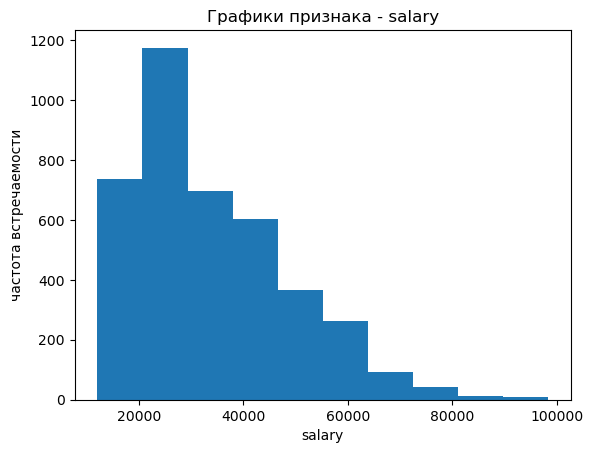

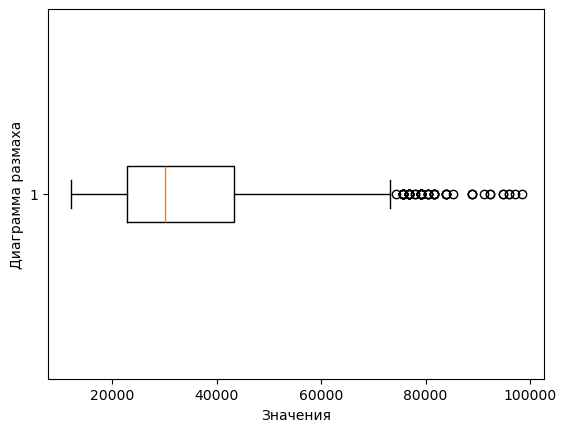

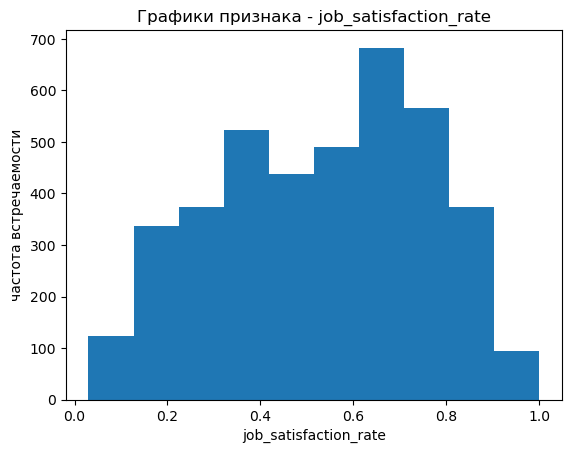

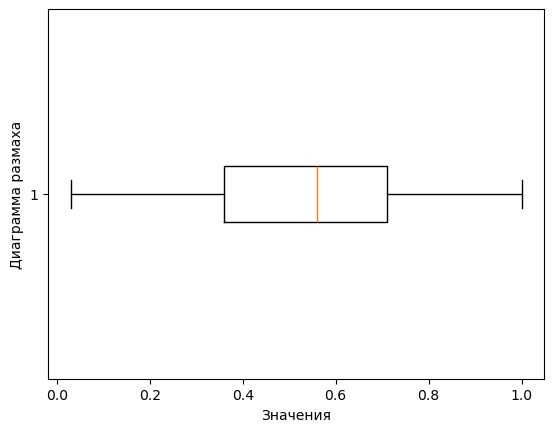

In [43]:
num_science (train_job, ['salary', 'job_satisfaction_rate'])

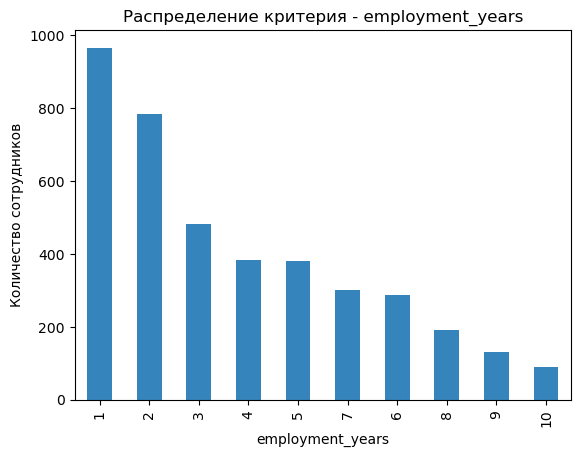

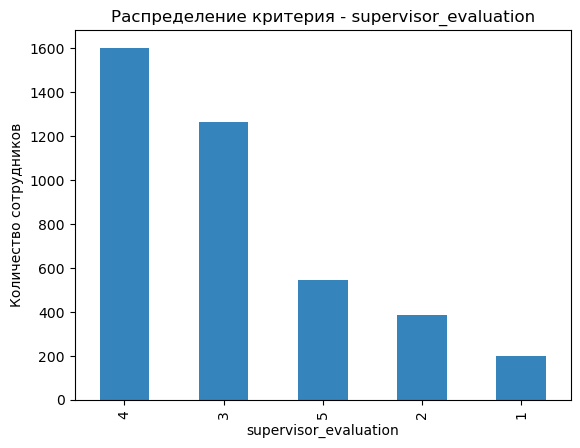

In [44]:
def num_cat_discr (data, priznak):
    for i in priznak: 
        data[i].value_counts().plot(kind='bar', alpha=0.9, title = f'Распределение критерия - {i}')
        plt.xlabel(i)
        plt.ylabel('Количество сотрудников')
        plt.show()

num_cat_discr (train_job, ['employment_years', 'supervisor_evaluation'])

In [45]:
train_job [train_job['supervisor_evaluation'] == 1].head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,medium,2,no,no,1,24000,0.58
18,sales,middle,high,2,yes,no,1,50400,0.39
32,hr,sinior,high,3,no,no,1,72000,0.22
45,technology,sinior,high,3,no,no,1,84000,0.21
53,technology,junior,high,1,no,no,1,37200,0.10


In [46]:
train_job [train_job['salary'] > 70000]['level'].value_counts()

level
sinior    85
Name: count, dtype: int64

<font color = 'blue'><b> Результаты анализа количественных переменных</b></font> 
1. В параметрах длительность работы в компании выбросов нет 
2. Обнаруженно, что в параметре оценка руководителя есть выброс = 1, после анализа сделан вывод, что данные корректные и не являются выбросами
3. Выбросы в заработной плате, которые показывает что ЗП > 70000 не является выбросом, а является действительной зп, т.к. только у сеньоров 
4. больше всего молодых сторудников, которые работают 1-3 года
5. Наиболее частая оценка сотрудников руководителем - 4

#### Train. Исследование качественных переменных 

In [49]:
def cat_science (data, features):
    for i in features: 
        (data
        .groupby(i) [i]
        .count()
        .plot(kind='pie', autopct='%1.1f%%', title = f'Распределение критерия - {i}'))
        plt.show()

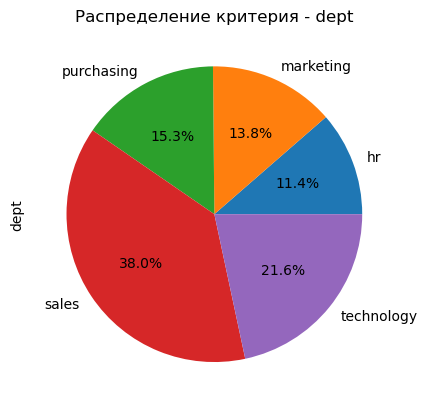

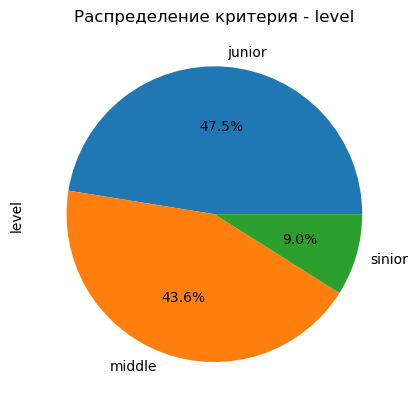

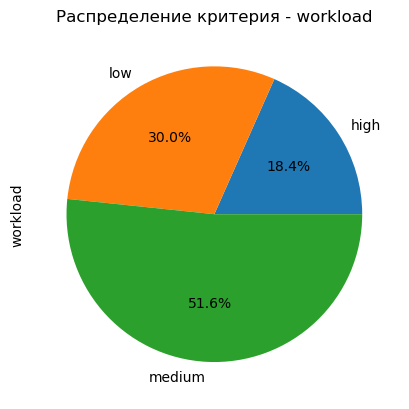

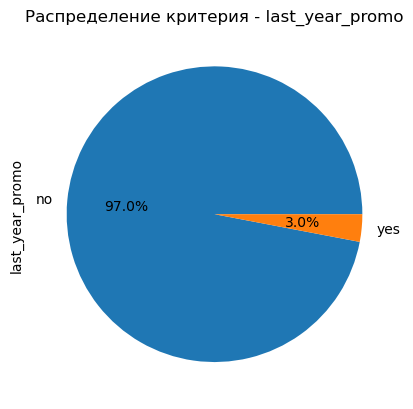

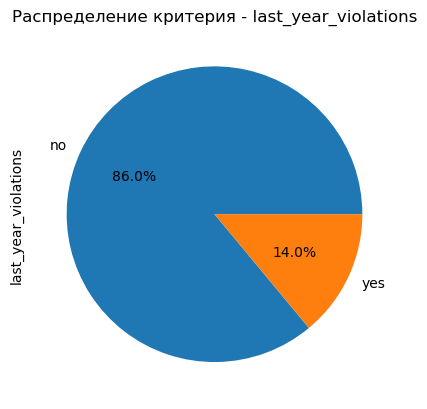

In [50]:
cat_science (train_job, cat_features)

<font color = 'blue'><b> Результат изучения категориальных переменных</b></font>

1.  Больше всего сотрудников работает в отделе продаж, меньше всего в hr отделе
2. Сеньоров в компании около 9%, остаток распределен +- поровну между мидлами и джунами 
3. у половины сотрудников средняя загрузка на работе, у 18% высокая, остальные относятся к низкой загрузке 
4. 3% сотрудников были повышены за последний год
5. 14% сотрудников нарушили трудовой договор

#### Test. Количественный анализ

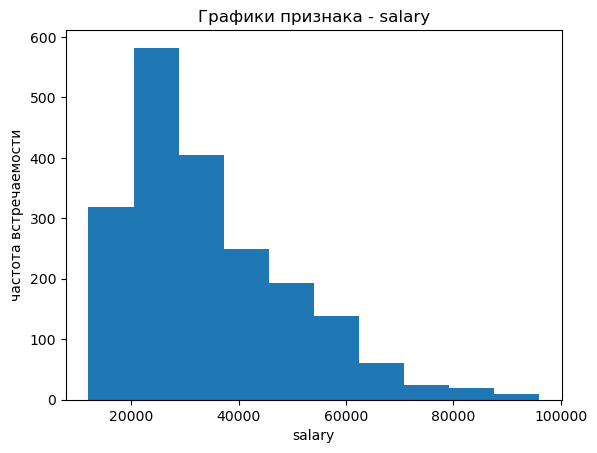

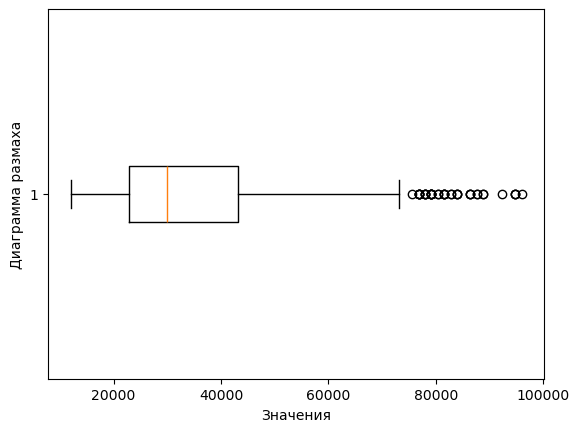

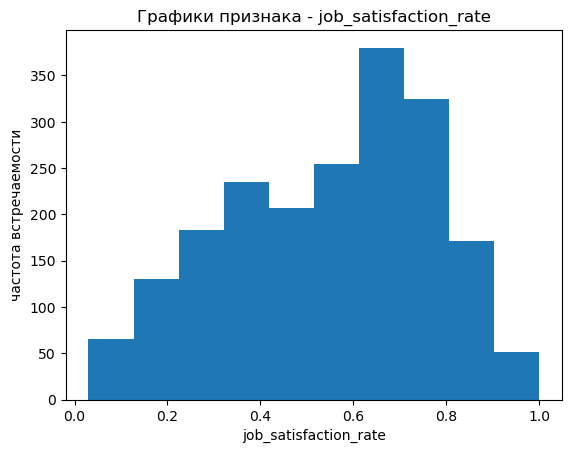

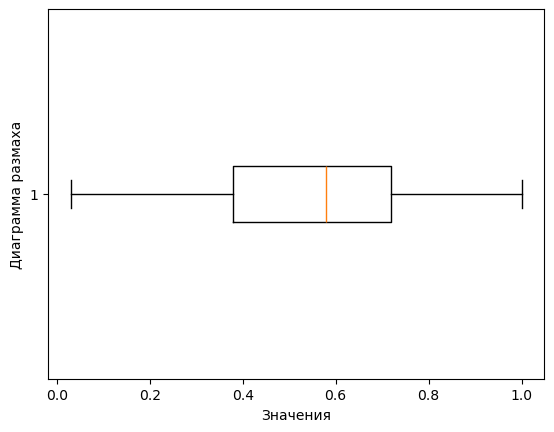

In [53]:
num_science (test, ['salary', 'job_satisfaction_rate'])

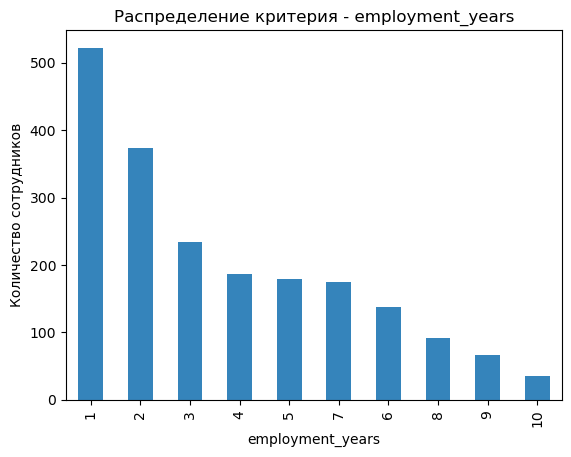

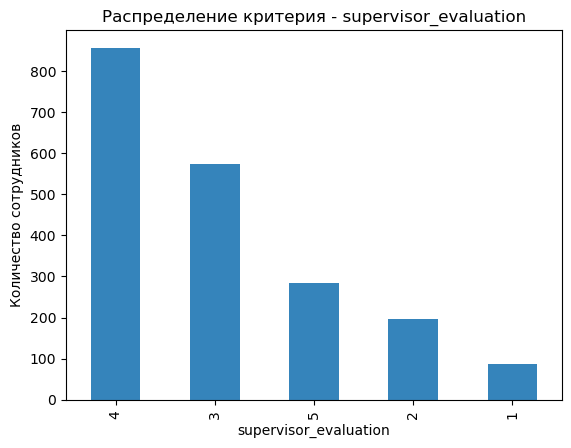

In [54]:
num_cat_discr (test, ['employment_years', 'supervisor_evaluation'])

Распределения идентично трейновой выборке 

#### Test. Качественный анализ

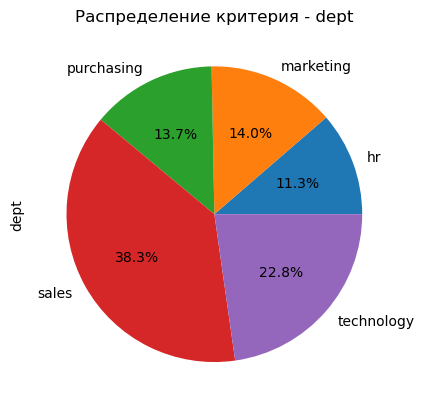

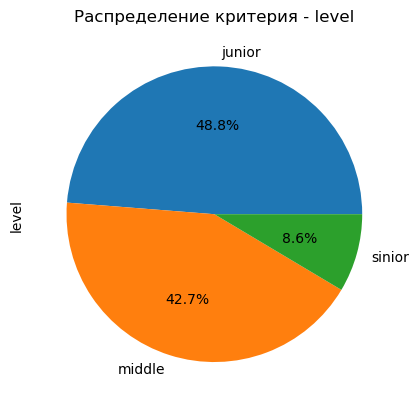

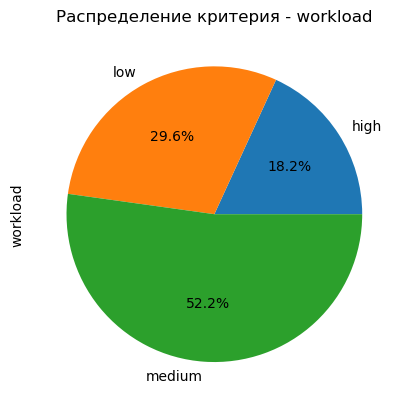

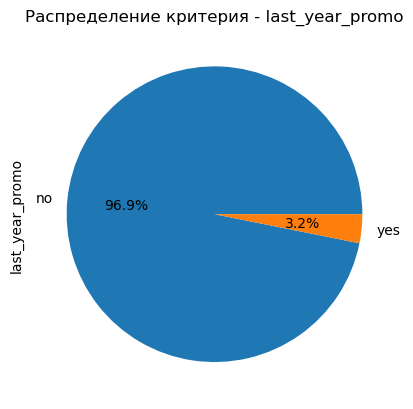

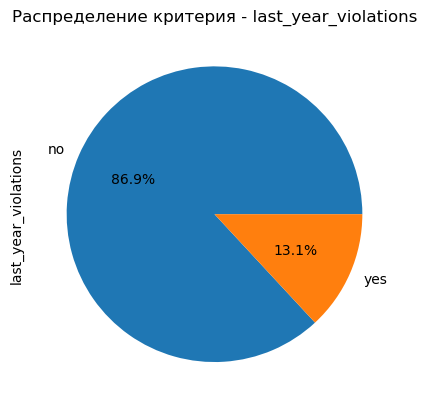

In [57]:
cat_science (test, cat_features)

Распределение абсолютно идентично трейновой выборке. 

<font color = 'blue' size = 5><b>Выводы по Исследовательскому Анализу</b></font>

Результаты анализа количественных переменных

- В параметрах длительность работы в компании выбросов нет
- Обнаруженно, что в параметре оценка руководителя есть выброс = 1, после анализа сделан вывод, что данные корректные и не являются выбросами
- Выбросы в заработной плате, которые показывает что ЗП > 70000 не является выбросом, а является действительной зп, т.к. только у сеньоров

Результат изучения категориальных переменных

- Больше всего сотрудников работает в отделе продаж, меньше всего в hr отделе
- Сеньоров в компании около 9%, остаток распределен +- поровну между мидлами и джунами
- у половины сотрудников средняя загрузка на работе, у 18% высокая, остальные относятся к низкой загрузке
- 3% сотрудников были повышены за последний год
- 14% сотрудников нарушили трудовой договор

**Сравнение трейновой и тестовой выборок идентично!**

### Корреляционный анализ 

#### Трейновая выборка

Проведем корреляционный анализ, используя Спирмана, phik matrix а так же критерий VIF

In [63]:
def correlation (x, num_cols):
    display('Матрица корреляций  - Коэф. Спримана')
    
    plt.figure (figsize = (7,7))
    sns.heatmap (x[num_cols].corr(method = 'spearman'), annot = True, cmap = 'cividis')
    plt.show()  
    
    display('Матрица корреляций  - phik Matrix')
    
    plt.figure (figsize = (7,7))
    sns.heatmap (x.phik_matrix(interval_cols = num_cols), annot = True, cmap = 'cividis')
    plt.show()
    
    display('VIF')
    
    x_vif = x[num_cols]
    X = add_constant (x_vif)
    vif_data = pd.Series ([variance_inflation_factor(X.values, i)
                          for i in range (X.shape[1])],
                         index = X.columns)
    display (vif_data)

'Матрица корреляций  - Коэф. Спримана'

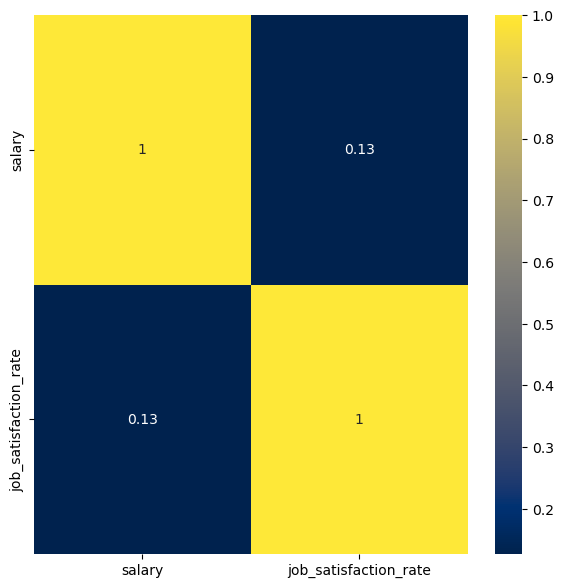

'Матрица корреляций  - phik Matrix'

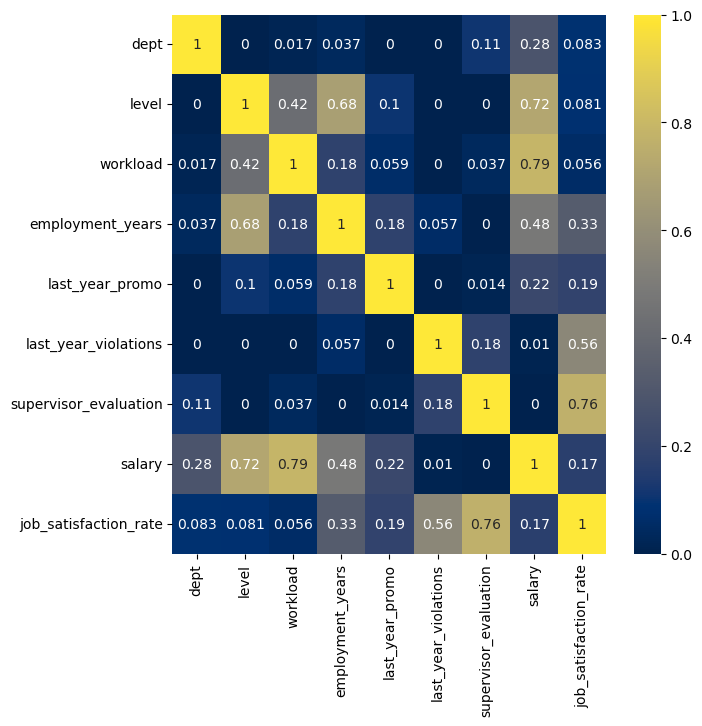

'VIF'

const                    10.690856
salary                    1.013374
job_satisfaction_rate     1.013374
dtype: float64

In [64]:
correlation (train_job, ['salary', 'job_satisfaction_rate'])

#### Тестовая выборка

проведем корреляционный анализ тестовой выборки

'Матрица корреляций  - Коэф. Спримана'

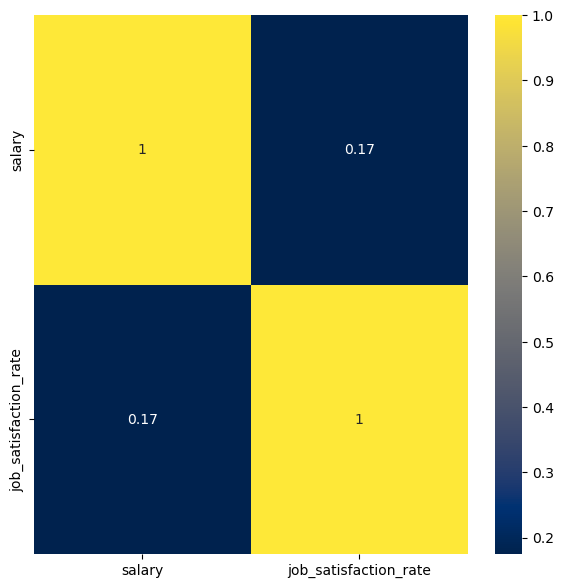

'Матрица корреляций  - phik Matrix'

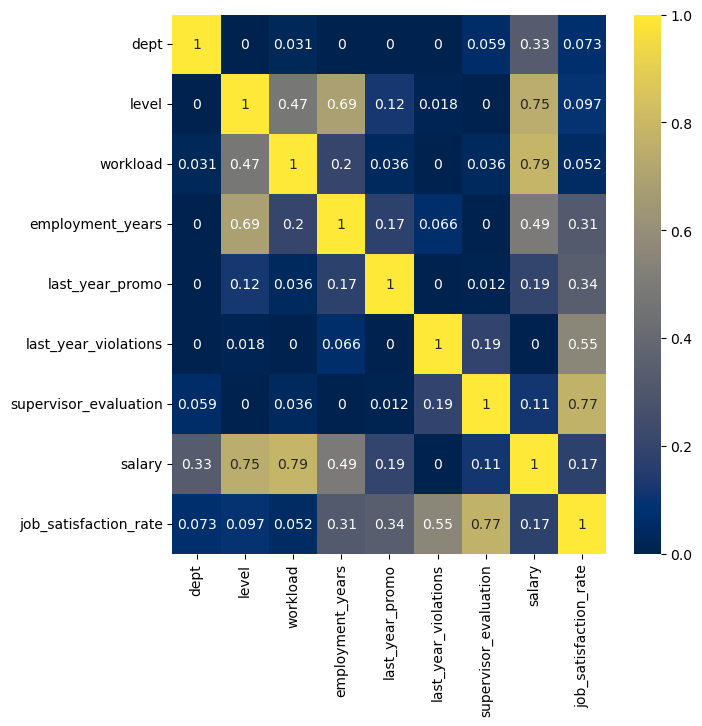

'VIF'

const                    10.449411
salary                    1.032797
job_satisfaction_rate     1.032797
dtype: float64

In [66]:
correlation (test, ['salary', 'job_satisfaction_rate'])

Мультиколлинеарности среди данных признаков
<font size = 4 color = 'green'><b> не наблюдается</b></font>
    
Сравнение корреалиционного анализа показало, что
<font size = 4 color = 'green'><b> данные идентичны

### Подготовка данных

<font color = 'orange' size = 5> Удалим дубликаты

In [70]:
train_job = train_job.drop_duplicates()

display(f'Кол-во дубликатов в таблице трейн - {train_job.duplicated().sum()}')

'Кол-во дубликатов в таблице трейн - 0'

Подготовку признаков выполните в пайплайне, дополнив пайплайн шага предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

In [72]:
# избавимся от лишних признаков в таблицах train_job и test

X_train = train_job.drop(columns = ['job_satisfaction_rate'], axis = 1)
y_train = train_job['job_satisfaction_rate']

X_test = test.drop(columns = ['job_satisfaction_rate'], axis = 1)
y_test = test['job_satisfaction_rate']

In [73]:
#Проверим размерность 

if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print('Все нормально, едем дальше')
else:
    print('Перепроверь, что-то не так') 

Все нормально, едем дальше


In [74]:
num_features = X_train.select_dtypes (include = 'number').columns
cat_features_ord = ['level', 'workload']
cat_features_ohe = ['dept', 'last_year_promo', 'last_year_violations']

ohe_pipeline = Pipeline(steps =
                       [
                           ('SimpleImputer_ohe',
                           SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                           ('ohe',
                           OneHotEncoder (drop = 'first', handle_unknown = 'ignore', sparse_output = False)
                           )
                       ])

ord_pipeline = Pipeline(steps = 
                       [
                           ('SimpleImputer_before_ord',
                           SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                           ('ord',
                            OrdinalEncoder(categories = [ 
                                                        ['junior', 'middle', 'sinior'],
                                                        ['low', 'medium', 'high']],
                                          handle_unknown = 'use_encoded_value',
                                          unknown_value = np.nan)
                           ),
                           ('SimpleImputer_after_ord', 
                            SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
                       ])

In [75]:
data_preprocessor = ColumnTransformer(transformers = 
                                     [
                                         ('ohe', ohe_pipeline, cat_features_ohe),
                                         ('ord', ord_pipeline, cat_features_ord),
                                         ('num', StandardScaler(), num_features)
                                     ],
                                     remainder = 'passthrough')



X_train_transformed = data_preprocessor.fit_transform(X_train)
X_test_transformed = data_preprocessor.transform(X_test)

ohe_features_name = data_preprocessor.named_transformers_['ohe'].named_steps['ohe'].get_feature_names_out(cat_features_ohe)
ord_features_name = cat_features_ord  
num_features_name = num_features  
all_features = np.concatenate([ohe_features_name, ord_features_name, num_features_name])

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_features)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_features)

display(X_train_transformed_df.sample(3))
display(X_test_transformed_df.sample(3))

,dept_marketing,dept_purchasing,dept_sales,dept_technology,last_year_promo_yes,last_year_violations_yes,level,workload,employment_years,supervisor_evaluation,salary
1031,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.320466,0.523093,-0.774798
2032,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.070682,-2.400409,0.739826
25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.635271,0.523093,1.457279


,dept_marketing,dept_purchasing,dept_sales,dept_technology,last_year_promo_yes,last_year_violations_yes,level,workload,employment_years,supervisor_evaluation,salary
1346,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.461829,-2.400409,-0.774798
626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.244124,0.523093,0.420958
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.102760,0.523093,-0.455930


<font color = 'blue' size = 5><b>Результаты выполнения подготовки данных</b></font>

В результате проведения данного пункта был написан пайплан в котором используются 2 инструмента для кодирования (для кодирования переменных с разбивкой их на дополнительные признаки и для кодирования признков по изменению для друг друга (low - medium - high)). 

Преобразована трейновая и тестовая выборка. Можно использовать в модели

Сформированы данные X_train_transformed_df, X_test_transformed_df, y_train, y_test

### Создание метрики, расчет моделей

Данный пункт выполняется следующим образом: 
1. создается функция которая будет описывать метрику
2. инициализируется модель теми или иными способами 
3. подсчитываются метрики, выбирается лучшая

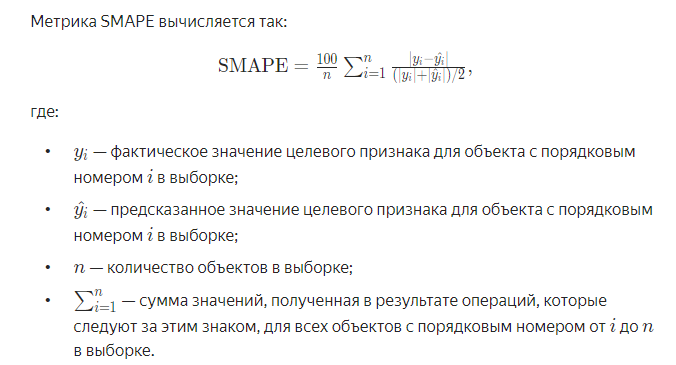

In [78]:
#Создаем собственную метрику
def SMAPE (y_true, y_pred):

    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2

    return 100 * np.mean(numerator / denominator)

smape_scorer = make_scorer(SMAPE, greater_is_better= False)

Обучите как минимум две модели. Возьмите одну линейную модель, а в качестве второй — дерево решений. Подберите гиперпараметры как минимум для одной модели с помощью одного из известных вам инструментов.

In [80]:
#Инициализируем параметры Линейной модели и дерева решений
RANDOM_STATE = 44

pipeline = Pipeline([
    ('model', LinearRegression())
])

In [81]:
param_grid = [
    {
        'model': [LinearRegression (n_jobs = -1)]
    },
    {
        'model': [DecisionTreeRegressor (random_state = RANDOM_STATE)],
        'model__max_depth': range(1,10),
        'model__min_samples_split': range(2,10),
        'model__min_samples_leaf': range(1,10)
    },
    {
        'model': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': range(1, 10)
    }
]

gs = GridSearchCV(estimator = pipeline,
                 param_grid = param_grid,
                 scoring = smape_scorer,
                 cv=5,
                 n_jobs = -1)

gs.fit (X_train_transformed_df, y_train)

print('Лучшая модель и её параметры:\n\n', gs.best_estimator_)
print()
print ('Метрика лучшей модели на тренировочной выборке (кросс валидация):', -gs.best_score_)

best_model = gs.best_estimator_
preds = best_model.predict(X_train_transformed_df)
print ('Метрика лучшей модели на тренировочной выборке:', SMAPE(y_train, preds))

C:\Users\nssavinov\AppData\Local\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Лучшая модель и её параметры:

 Pipeline(steps=[('model', RandomForestRegressor(max_depth=9, random_state=44))])

Метрика лучшей модели на тренировочной выборке (кросс валидация): 15.319019450384351
Метрика лучшей модели на тренировочной выборке: 12.601646441953207


In [82]:
y_pred = gs.predict(X_test_transformed_df)

print(f'Метрика SMAPE на тестовой выборке: {SMAPE(y_test, y_pred)}')

Метрика SMAPE на тестовой выборке: 14.14095481344691


### Выводы по решению первой задачи

В результате решения этой задачи были выполнены следующие пункты: 
1. Предобработанны данные, заполнены пропуски, удалины явные дубликаты, изучены неявные дубликаты
2. Проведен исследовательский анализ и корреляционный анализ, мультиколлинеарности не обнаруженно 
3. Подготовленны данные, проводилось масштабирование и кодирование данных, в качестве инструмента для кодирования использововался OneHotEncoder и OrdinalEncoder
4. Метрика SMAPE занесена вручную и в дальнейшем используется
5. Перебраны 3 модели: линейной регрессии, дерева решений и случайный лес, у последних 2х перебирались гиперпараметры
6. Лучшей моделью оказалась модель случайного леса, с max_depth=9, random_state=44
7. метрика качества на тестовой выборке = 14.14, что < 15, считаем что критерий успеха достигнут

## Прогнозирование уволится сотрудник или нет

### Загрузка данных 

In [86]:
train_quit = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\8 Сборный проект 2\train_quit.csv")
test_features = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\8 Сборный проект 2\test_features.csv")
test_target_quit = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\8 Сборный проект 2\test_target_quit.csv")

In [87]:
for i in [train_quit, test_features, test_target_quit]:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

<font color = 'blue'><b>Результаты выгрузки данных и их изучения:</b></font>  
1. Обнаружены пропуски в 2й таблице, заполним при помощи созданной функции в пункте 3.2.1
2. Все данные соответствуют в таблицах

### Предобработка данных

#### Обработка пропусков

In [91]:
test_features.loc[test_features['dept'] == ' ', 'dept'] = np.nan
test_features.loc[test_features['workload'] == ' ', 'workload'] = np.nan

In [92]:
prepos_silince (train_quit, test_features, priznak_silence)

for i in [train_quit, test_features, test_target_quit]:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   2000 non-null   object
 2   level                  2000 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

<font color = 'blue'><b> Пропуски устранены, перейдем к проверке на явные и неявные дубликаты</b><font>
   

#### Подготовка таблиц

Объеденим таблицы test_features & test_tagret_quit

In [96]:
test_features = pd.merge(test_features, test_target_quit, left_on = 'id', right_on = 'id')
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   2000 non-null   object
 2   level                  2000 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB


In [97]:
test_features_436 = test_features.copy()
train_quit = train_quit.drop(columns = 'id', axis = 1)
test_features = test_features.drop(columns = 'id', axis = 1)

#### Проверка на явные дубликаты

In [99]:
print (f'Явные дубликаты - {train_quit.duplicated().sum()}')

Явные дубликаты - 1413


<font color = 'blue'><b> Явные дубликаты обнаруженны</b></font>. Удалим их в пункте 4.5. 

#### Проверка на неявные дубликаты

In [102]:
for i in implicit_duplicates:
    display(f'Таблица train_quit, критерий {i} {list( train_quit[i].sort_values().unique())}')

"Таблица train_quit, критерий dept ['hr', 'marketing', 'purchasing', 'sales', 'technology']"

"Таблица train_quit, критерий level ['junior', 'middle', 'sinior']"

"Таблица train_quit, критерий workload ['high', 'low', 'medium']"

"Таблица train_quit, критерий last_year_promo ['no', 'yes']"

"Таблица train_quit, критерий last_year_violations ['no', 'yes']"

<font color = 'blue'><b> Неявных дубликатов не обнаруженно</b></font> 

<font color = 'blue' size = 5><b> Выводы по предобработке данных </b></font>

1. Таблицы от пропусков
2. Произведено обновление данных в таблице, избавились от айдишников 
3. Проверены явные дубликаты, устранены 
4. Проверены неявные дубликаты, не обнаружены 

### Исследовательский анализ данных

#### Train Исследование количественных переменных

Используем имеющуюся функцию из пункта 3.3.1  

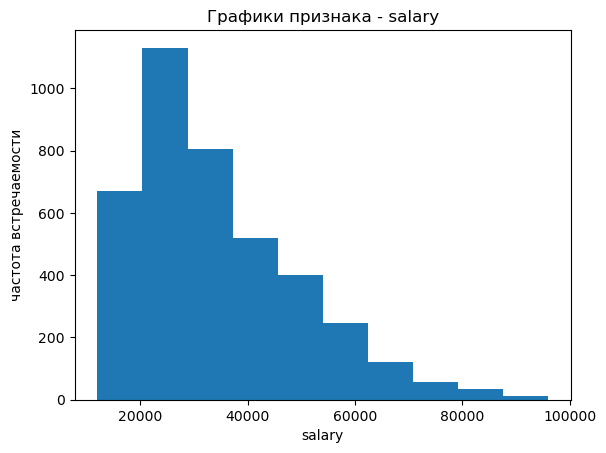

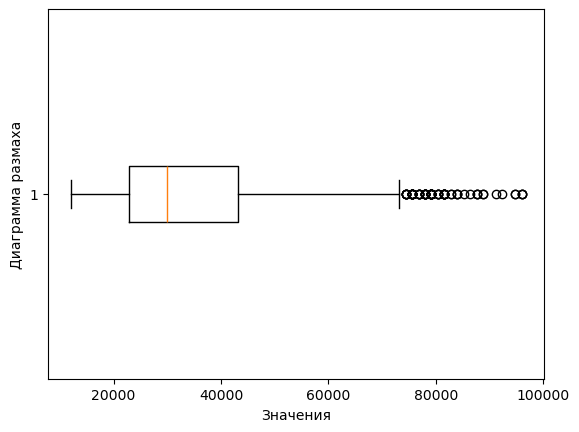

In [108]:
num_features_quit = train_quit.select_dtypes(include = 'number').columns

num_science (train_quit, ['salary'])

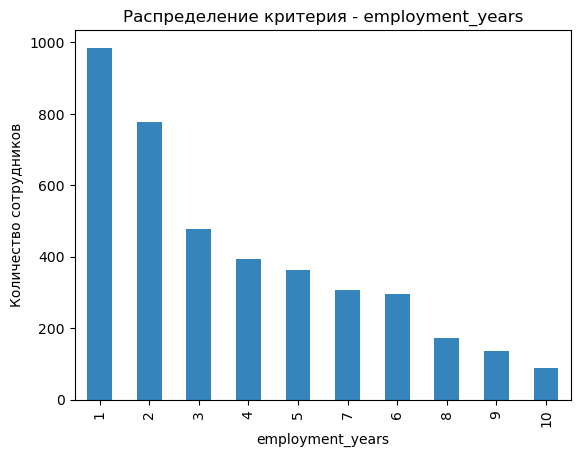

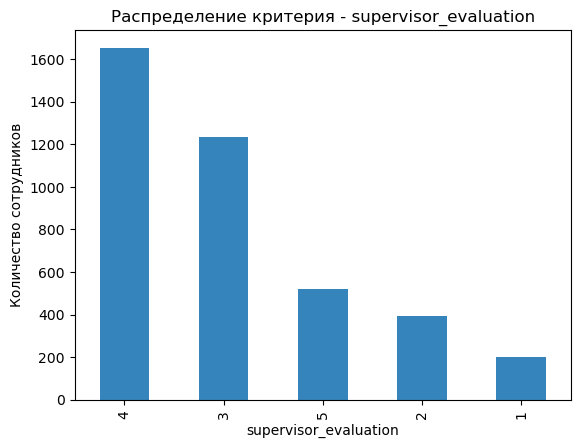

In [109]:
num_cat_discr (train_quit, ['employment_years', 'supervisor_evaluation'])

<font color = 'blue'>Распределение нормальное, критичных выбросов нет!

#### Train. Исследование качественных переменных

Используем имеющуюся функцию из пункта 3.3.1  

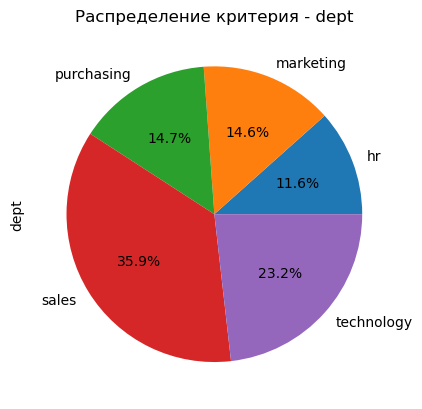

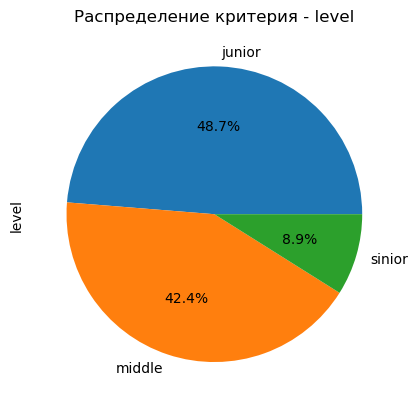

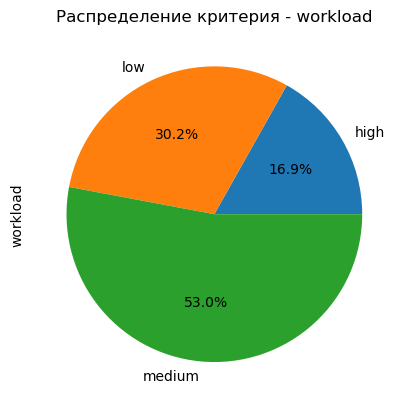

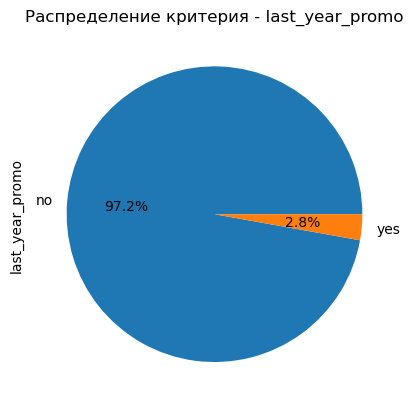

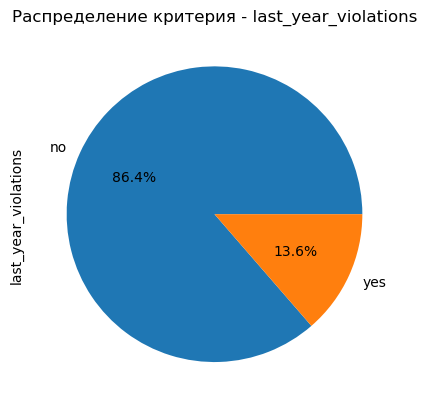

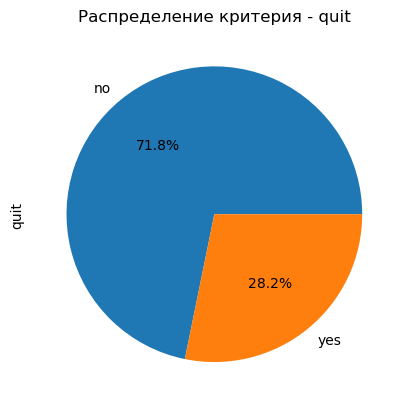

In [113]:
cat_features_quit = train_quit.select_dtypes(exclude = 'number').columns
cat_science (train_quit, cat_features_quit)

<font color = 'blue'>Итоги категориального анализа</font>

1. Больше всего человек работает в отделе продаж, меньше всего в hr
2. Распределение между уровнями сотрудников, сеньоров 13, джунов 37, мидлов 50% 
3. Нагрузка 50% средняя, 23% сильная 
4. 4.3% в прошлом году получили повышение 
5. 18% получили предписание 
6. 25% уволилось! 

#### Test Исследование количественных переменных

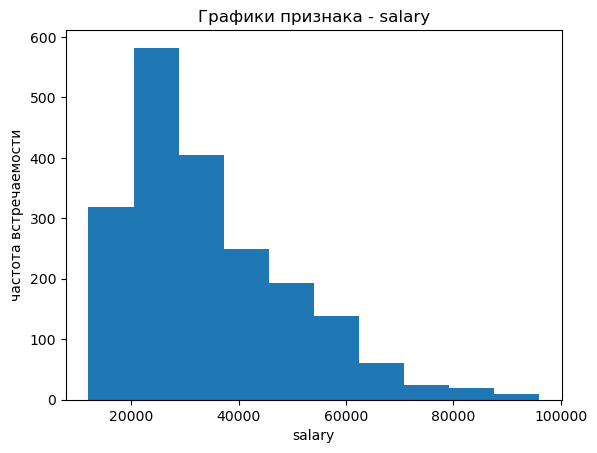

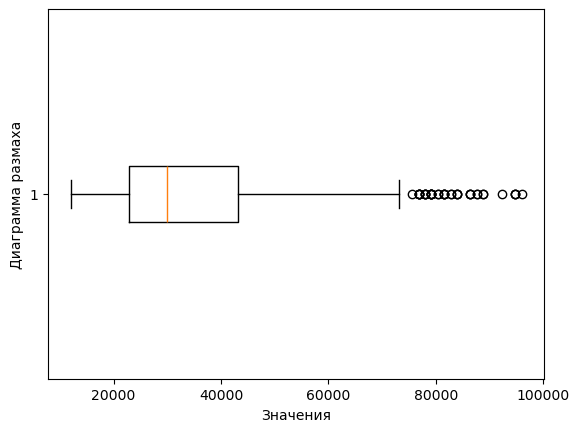

In [116]:
num_science (test_features, ['salary'])

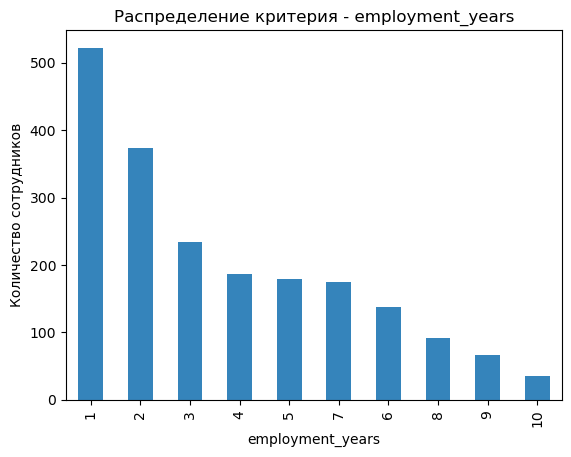

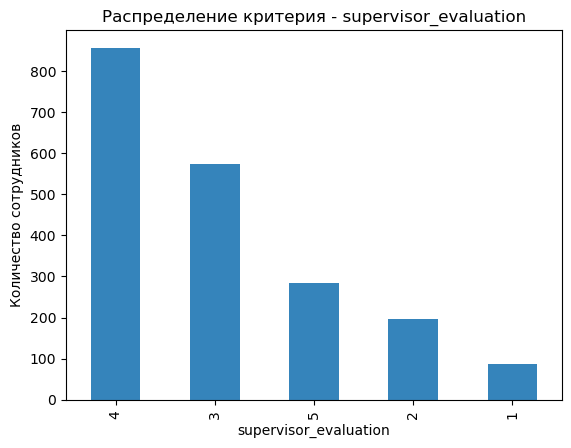

In [117]:
num_cat_discr (test_features, ['employment_years', 'supervisor_evaluation'])

#### Test. Исследование качественных переменных

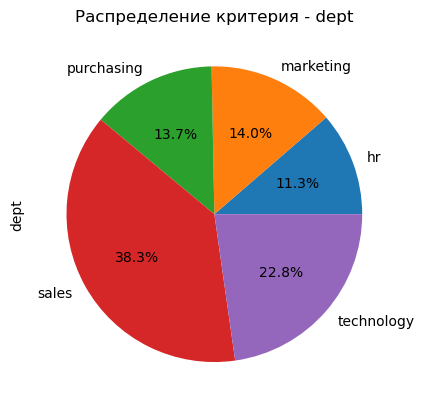

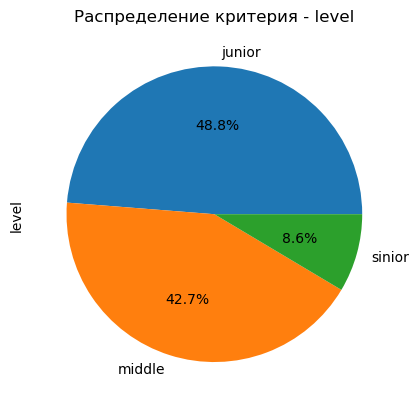

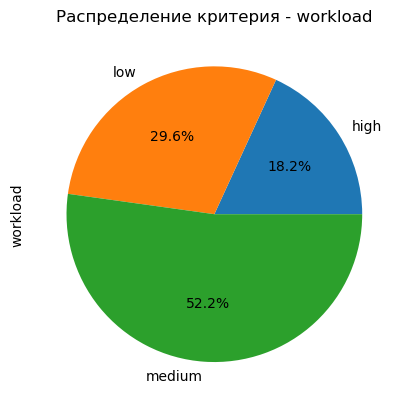

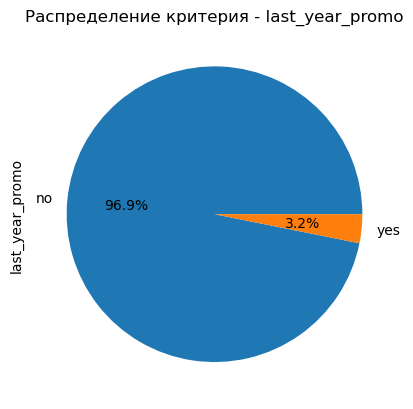

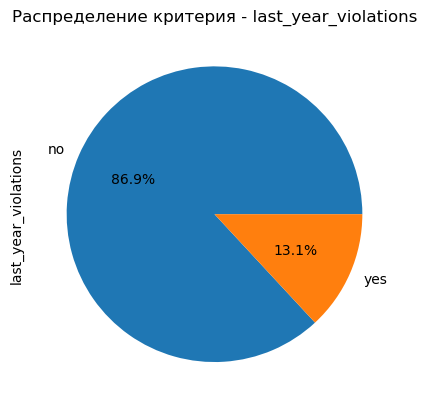

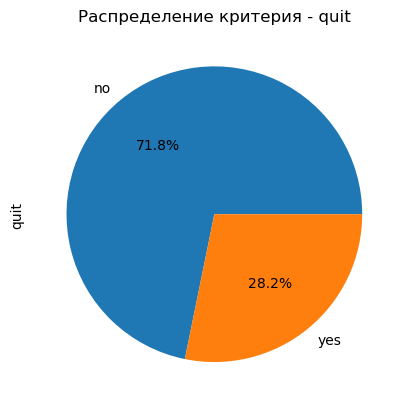

In [119]:
cat_science (test_features, cat_features_quit)

<font color ='orange' size = 4> Результаты проведенного анализа:</font>
1. Данные по распределению совпадают 

#### Составьте портрет «уволившегося сотрудника». 

Изучим по департаментам

In [123]:
dept_quit = train_quit.pivot_table (index = 'dept', columns = 'quit', values = 'salary', aggfunc = ['count', 'median']).reset_index()
dept_quit ['perc'] = dept_quit ['count','yes'] / (dept_quit ['count','yes'] + dept_quit ['count','no'])
dept_quit = dept_quit.drop (columns = ['count'], axis = 1)
dept_quit.sort_values(by = 'perc', ascending = False)

C:\Users\nssavinov\AppData\Local\Temp\ipykernel_11544\2907964138.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dept_quit = dept_quit.drop (columns = ['count'], axis = 1)


dept   median               perc
quit                   no      yes          
4     technology  38400.0  26400.0  0.297414
3          sales  33600.0  20400.0  0.283032
2     purchasing  33600.0  21600.0  0.282313
1      marketing  36000.0  24000.0  0.280069
0             hr  34800.0  22200.0  0.250000

In [124]:
load_dept = train_quit.pivot_table (index = 'dept', columns = ['workload', 'quit'], values = 'salary', aggfunc = ['count']).reset_index()
load_dept ['high'] = ((load_dept ['count', 'high', 'no'] + load_dept ['count', 'high', 'yes']) 
                      /(load_dept ['count', 'high', 'no'] + load_dept ['count', 'high', 'yes'] 
                        + load_dept ['count', 'low', 'no'] + load_dept ['count', 'low', 'yes'] 
                        +load_dept ['count', 'medium', 'no'] + load_dept ['count', 'medium', 'yes']))

load_dept ['medium'] = ((load_dept ['count', 'medium', 'no'] + load_dept ['count', 'medium', 'yes']) 
                        /(load_dept ['count', 'medium', 'no'] + load_dept ['count', 'medium', 'yes'] 
                          + load_dept ['count', 'low', 'no'] + load_dept ['count', 'low', 'yes'] 
                          +load_dept ['count', 'high', 'no'] + load_dept ['count', 'high', 'yes']))

load_dept ['low'] = ((load_dept ['count', 'low', 'no'] + load_dept ['count', 'low', 'yes']) 
                        /(load_dept ['count', 'medium', 'no'] + load_dept ['count', 'medium', 'yes'] 
                          + load_dept ['count', 'low', 'no'] + load_dept ['count', 'low', 'yes'] 
                          +load_dept ['count', 'high', 'no'] + load_dept ['count', 'high', 'yes']))

load_dept ['high_yes'] = load_dept ['count', 'high', 'yes'] / (load_dept ['count', 'high', 'yes'] + load_dept ['count', 'high', 'no'])
load_dept ['medium_yes'] = load_dept ['count', 'medium', 'yes'] / (load_dept ['count', 'medium', 'yes'] + load_dept ['count', 'medium', 'no'])
load_dept ['low_yes'] = load_dept ['count', 'low', 'yes'] / (load_dept ['count', 'low', 'yes'] + load_dept ['count', 'low', 'no'])

load_dept = load_dept.drop(columns = 'count', axis =1)
load_dept.sort_values (by = 'high_yes', ascending = False)

C:\Users\nssavinov\AppData\Local\Temp\ipykernel_11544\1070851790.py:21: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  load_dept = load_dept.drop(columns = 'count', axis =1)


,dept,high,medium,low,high_yes,medium_yes,low_yes
workload,,,,,,,
quit,,,,,,,
2,purchasing,0.156463,0.549320,0.294218,0.228261,0.216718,0.433526
4,technology,0.160560,0.531250,0.308190,0.201342,0.253550,0.423077
1,marketing,0.187285,0.515464,0.297251,0.183486,0.240000,0.410405
3,sales,0.174548,0.524339,0.301113,0.171315,0.234748,0.431871
0,hr,0.157328,0.534483,0.308190,0.095890,0.177419,0.454545


Исследуем количество лет в компании уволившегося сотрудника 

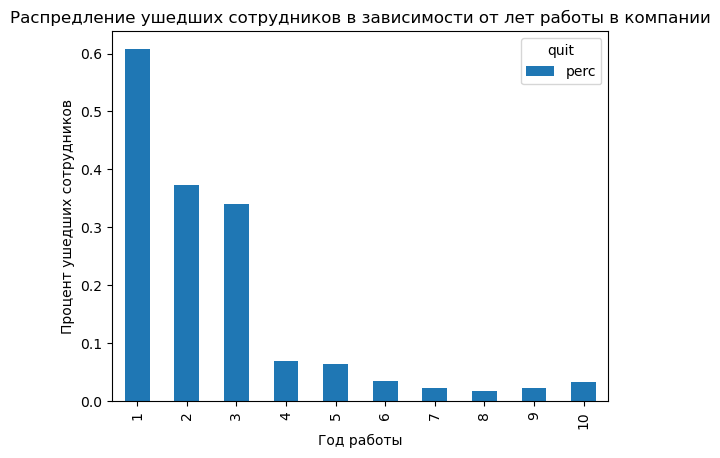

In [126]:
quit_years = train_quit.pivot_table (columns = 'quit', index = 'employment_years', values = 'dept', aggfunc = 'count')
quit_years['perc'] = quit_years['yes'] / (quit_years['no'] + quit_years['yes'])
(quit_years
.drop(columns = ['no', 'yes'], axis =1)
.plot(kind = 'bar', title = 'Распредление ушедших сотрудников в зависимости от лет работы в компании'))
plt.xlabel ('Год работы')
plt.ylabel ('Процент ушедших сотрудников')
plt.show()

Исследуем зп медианную уволившегося сотрудника и работающего 

In [128]:
train_quit.pivot_table (columns = 'quit', values = 'salary', aggfunc = ['mean', 'median'])

mean                 median         
quit              no           yes       no      yes
salary  37702.228412  23885.106383  34800.0  22800.0

Исследуем уровень уволившегося сотрудника

In [130]:
train_quit[train_quit['quit'] == 'yes']['level'].value_counts(normalize=True)

level
junior    0.889184
middle    0.095745
sinior    0.015071
Name: proportion, dtype: float64

Исследуем повышение сотрудника 

In [132]:
train_quit[train_quit['quit'] == 'yes']['last_year_promo'].value_counts(normalize=True)

last_year_promo
no     0.999113
yes    0.000887
Name: proportion, dtype: float64

Исследуем предписание сотрудника, были или нет

In [134]:
train_quit[train_quit['quit'] == 'yes']['last_year_violations'].value_counts(normalize=True)

last_year_violations
no     0.797872
yes    0.202128
Name: proportion, dtype: float64

Исследуем оценку супервайзера сотрудника

In [136]:
train_quit[train_quit['quit'] == 'yes']['supervisor_evaluation'].value_counts(normalize=True)

supervisor_evaluation
3    0.463652
4    0.253546
2    0.145390
1    0.084220
5    0.053191
Name: proportion, dtype: float64

Исследуем уровень workload

In [138]:
train_quit[train_quit['quit'] == 'yes']['workload'].value_counts(normalize=True)

workload
low       0.460106
medium    0.432624
high      0.107270
Name: proportion, dtype: float64

<font color = 'purple' size = 5><b> Результаты составления портрета уволившегося сотрудника</b></font>

1. больше всего сотрудников увольняется из отдела purchasing, медианная зп - 22800 что находится на нижней границе медианных зп 
2. Так же больше всего сотрудников увольняется в этом же отделе с высокой или низкой нагрузкой. 
3. от 40 до 60 процентов сотрудников увольняется на 1-3 году в компании, т.е. меньше всего стремятся к увольнению долгоработающие люди в компании 
4. Медианная зп и средняя зп на 15 к меньше у уволившихся, чем у оставшихся в компании
5. Чаще всего уходят люди уровня junior 82%
6. Повышение и предписание никак не влияют, т.к. +- соответсвуют распредлению в датасете, т.е. нет какой то зависимости что если есть повышение то не уволится или есть предприсание то уволится 
7. Оценка супервайзера - 3, самая частая оценка ухода из компании
8. по уровню загрузки самое частое medium, low

Портрет: 
Сотрудник работающий в отделе закупок с высокой или особенно с **низкой** нагрузкой у которого зп  около 22-26 к, работающий в компании 1-3 года, уровня junior, с оценкой супервайзера не 5(самая частая 3), низкая или средняя загрузка

#### Добавление к таблицам удовлетворенность сотрудников

In [141]:
test_check_corr_quit_rate = pd.merge(test_features_436, test_target, left_on = 'id', right_on = 'id')

<font color = 'orange' size = 5><b>Проверьте:</b></font>

визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

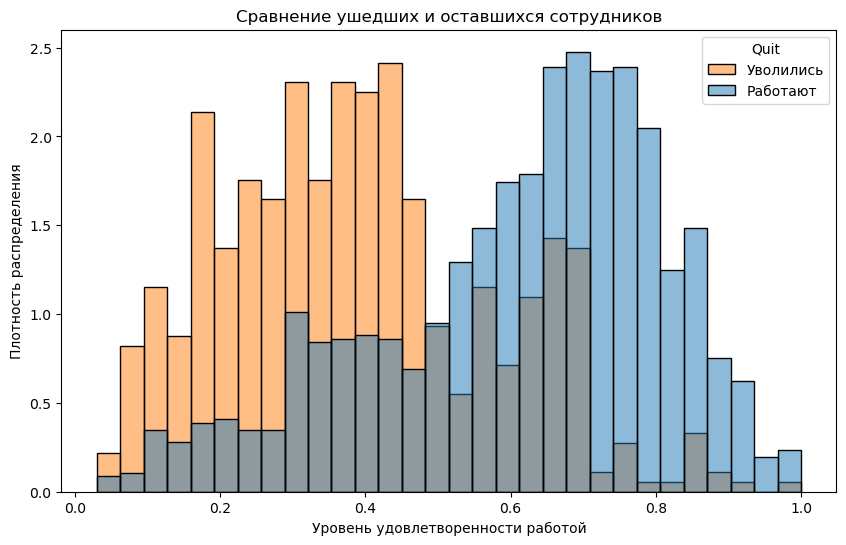

In [143]:
plt.figure(figsize=(10, 6))

sns.histplot(data=test_check_corr_quit_rate, x = 'job_satisfaction_rate', hue = 'quit', stat = 'density', common_norm=False, bins=30)

plt.legend(title='Quit', labels=['Уволились', 'Работают'])
plt.title ('Сравнение ушедших и оставшихся сотрудников')
plt.xlabel('Уровень удовлетворенности работой')
plt.ylabel('Плотность распределения')
plt.show()

Матрица корреляций  - phik Matrix


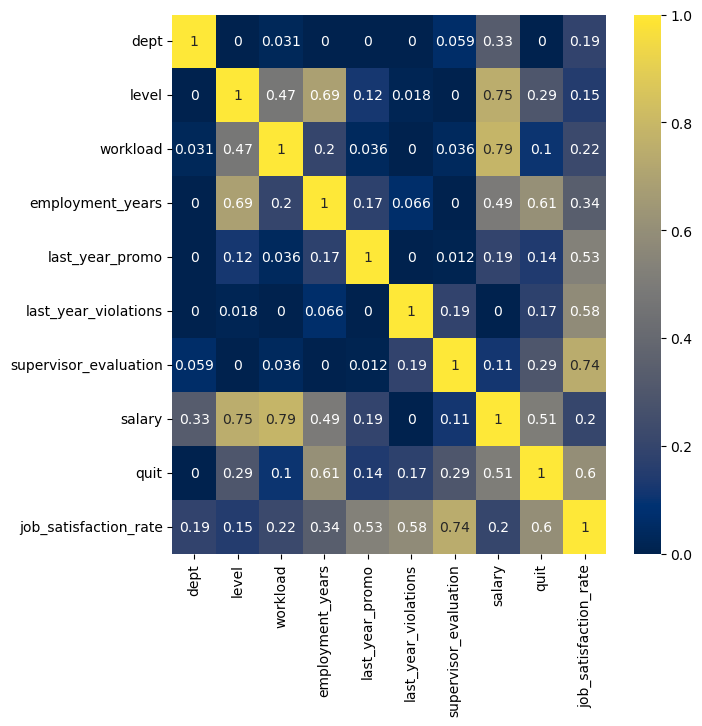

In [144]:
test_check_corr_quit_rate = test_check_corr_quit_rate.drop(columns = 'id', axis = 1)
num_features_quit_corr = test_check_corr_quit_rate.select_dtypes(include = 'number').columns
print('Матрица корреляций  - phik Matrix')
plt.figure (figsize = (7,7))
sns.heatmap (test_check_corr_quit_rate.phik_matrix(interval_cols = ['salary']), annot = True, cmap = 'cividis')
plt.show()

<font color = 'blue' > Анализ влияния удовлетворенности сотрудника:</font>

Зависимость между "показателем удовлетворенность сотрудника" и "Увольнение" имеется. По гистограмме видно что в массе уволившихся сотрудников на 100% не было довольных своей работой и в большей степени все были недовольны, а также была построенна phik_matrix, которая показывает наличие зависомости между этими показателями. Решено в дальнейшем использовать их для улучшения точности прогноза по увольнению. 

<font color = 'blue' size = 5><b> Вывод о прошедшем пункте</b></font> 

В результате проведения исследовательского анализа было устаносленно следующее: 
1. выбросов в тестовых данных нет распределения нормальные 
2. Исследования каственных переменных показал: 
- Больше всего человек работает в отделе продаж, меньше всего в hr
- Распределение между уровнями сотрудников, сеньоров 13, джунов 37, мидлов 50% 
- общая Нагрузка 50% средняя, 23% сильная
- 4.3% в прошлом году получили повышение
- 18% получили предписание
- 25% уволилось!
3. Составлен портрет сотрудника наиболее вероятного к увольнению : Портрет: Сотрудник работающий в отделе закупок с высокой или низкой нагрузкой у которого зп около 22800
4. проведен анализ влияния удовлетворенности сотрудника: Зависимость между "показателем удовлетворенность сотрудника" и "Увольнение" имеется. По гистограмме видно что в массе уволившихся сотрудников на 100% не было довольных своей работой и в большей степени все были недовольны, а также была построенна phik_matrix, которая показывает наличие зависомости между этими показателями. Решено в дальнейшем использовать их для улучшения точности прогноза по увольнению.
5. распределение в трейновой и тестовой выборке одинаково

### Добавление нового входного признака

Добавьте job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

Добавим к таблице test_features данный входной признак!

In [148]:
X_test_quit = test_features.drop(columns = 'quit', axis=1)

X_test_quit_transformed = data_preprocessor.transform(X_test_quit)

X_test_quit_transformed_df = pd.DataFrame(X_test_quit_transformed, columns=all_features)

y_test_quit_pred = pd.DataFrame(best_model.predict(X_test_quit_transformed_df), columns = ['Predicted_Quit_Rate'])

test_features  = pd.concat ([test_features, y_test_quit_pred], axis = 1)

**Трейновую выборку**

In [150]:
X_train_quit = train_quit.drop(columns = 'quit', axis=1)

X_train_quit_transformed = data_preprocessor.fit_transform(X_train_quit)

X_train_quit_transformed_df = pd.DataFrame(X_train_quit_transformed, columns=all_features)

In [151]:
y_train_quit_pred = pd.DataFrame(best_model.predict(X_train_quit_transformed_df), columns = ['Predicted_Quit_Rate'])

In [152]:
train_quit.reset_index(drop=True, inplace=True)

In [153]:
train_quit  = pd.concat ([train_quit, y_train_quit_pred], axis = 1)

<font color = 'orange' size = 5> Проверим: 

In [155]:
display (train_quit.head())
display (train_quit.info())
display (test_features.head())
display (test_features.info())

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,Predicted_Quit_Rate
0,sales,middle,high,2,no,no,4,54000,no,0.629997
1,sales,junior,medium,2,no,no,4,27600,no,0.834462
2,purchasing,middle,medium,5,no,no,1,37200,no,0.427181
3,sales,junior,medium,2,no,yes,3,24000,yes,0.311229
4,marketing,junior,medium,2,no,no,5,25200,no,0.811483


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   4000 non-null   object 
 1   level                  4000 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   quit                   4000 non-null   object 
 9   Predicted_Quit_Rate    4000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 312.6+ KB


None

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,Predicted_Quit_Rate
0,marketing,junior,medium,2,no,no,5,28800,no,0.829072
1,hr,junior,medium,1,no,no,4,30000,no,0.662591
2,sales,middle,low,5,no,no,4,19200,no,0.659415
3,sales,middle,low,6,no,no,4,19200,no,0.664187
4,hr,middle,medium,5,no,no,5,40800,no,0.781854


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   2000 non-null   object 
 1   level                  2000 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   quit                   2000 non-null   object 
 9   Predicted_Quit_Rate    2000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 156.4+ KB


None

<font color = 'blue' size = 5><b> Вывод о прошедшем пункте</b></font> 

Таблицы для проведения финального исследования готовы, признаки включены!

### Подготовка данных

In [158]:
train_quit = train_quit.drop_duplicates()

print (f'Явные дубликаты - {train_quit.duplicated().sum()}')

Явные дубликаты - 0


<font color = 'blue'><b> Произведена очестка от явных дубликатов</b></font>

Выполните подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

1. разделим данные на X и y
2. используем пайплан написанный в пункте 3.5

In [161]:
X_train = train_quit.drop (columns = 'quit', axis = 1) 
y_train = train_quit['quit']
X_test = test_features.drop (columns = 'quit', axis = 1) 
y_test = test_features['quit']

Используем в предобработке X_train и X_test. Напишем Пайплайн

In [163]:
num_features = X_train.select_dtypes (include = 'number').columns
cat_features_ord = ['level', 'workload']
cat_features_ohe = ['dept', 'last_year_promo', 'last_year_violations']

ohe_pipeline = Pipeline(steps =
                       [
                           ('simpleImputer_ohe',
                           SimpleImputer (missing_values = np.nan, strategy = 'most_frequent')),
                           ('ohe',
                           OneHotEncoder (drop = 'first', handle_unknown = 'ignore', sparse_output = False)
                           )
                       ])

ord_pipeline = Pipeline(steps = 
                       [
                           ('simpleImputer_before_ord',
                           SimpleImputer (missing_values = np.nan, strategy = 'most_frequent')),
                           ('ord',
                            OrdinalEncoder(categories = [ 
                                                        ['junior', 'middle', 'sinior'],
                                                        ['low', 'medium', 'high']],
                                          handle_unknown = 'use_encoded_value',
                                          unknown_value = np.nan)
                           ),
                           ('simpleImputer_after_ord',
                           SimpleImputer (missing_values = np.nan, strategy = 'most_frequent'))
                       ])

data_preprocessor = ColumnTransformer(transformers = 
                                     [
                                         ('ohe', ohe_pipeline, cat_features_ohe),
                                         ('ord', ord_pipeline, cat_features_ord),
                                         ('num', StandardScaler(), num_features)
                                     ],
                                     remainder = 'passthrough')



X_train_transformed = data_preprocessor.fit_transform(X_train)
X_test_transformed = data_preprocessor.transform(X_test)

ohe_features_name = data_preprocessor.named_transformers_['ohe'].named_steps['ohe'].get_feature_names_out(cat_features_ohe)
ord_features_name = cat_features_ord  
num_features_name = num_features  
all_features = np.concatenate([ohe_features_name, ord_features_name, num_features_name])

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_features)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_features)

display(X_train_transformed_df.sample(3))
display(X_test_transformed_df.sample(3))

,dept_marketing,dept_purchasing,dept_sales,dept_technology,last_year_promo_yes,last_year_violations_yes,level,workload,employment_years,supervisor_evaluation,salary,Predicted_Quit_Rate
1556,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.082048,-0.340724,-0.215669,-1.624858
397,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.466575,-0.340724,-0.732141,-0.592517
2449,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,-0.082048,-0.340724,1.997780,-1.131356


,dept_marketing,dept_purchasing,dept_sales,dept_technology,last_year_promo_yes,last_year_violations_yes,level,workload,employment_years,supervisor_evaluation,salary,Predicted_Quit_Rate
97,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.687005,-2.192517,0.743492,-0.526599
1751,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.235627,1.511068,-1.101049,0.644392
891,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.840584,-1.266620,-0.215669,-0.505663


<font color = 'blue' size = 5><b>Результаты выполнения подготовки данных</b></font>

В результате проведения данного пункта был написан пайплан в котором используются 2 инструмента для кодирования (для кодирования переменных с разбивкой их на дополнительные признаки и для кодирования признков по изменению для друг друга (low - medium - high)). 

Преобразована трейновая и тестовая выборка. Можно использовать в модели

Сформированы данные X_train_transformed_df, X_test_transformed_df, y_train, y_test

### Обучение модели

Обучите как минимум три модели. Как минимум для двух из них подберите гиперпараметры. Проверьте качество лучшей модели.
Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC 
≥0.91 на тестовой выборке. Напомним: отбор признаков часто помогает улучшить метрику.

In [167]:
pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='mean')),
        ('model', LogisticRegression(random_state = RANDOM_STATE))
    ])

params = [
    {
        'model': [LogisticRegression(random_state = RANDOM_STATE,
                                   penalty = 'l1',
                                   solver = 'liblinear')],
        'model__C': range(1, 10)
    },
    {
        'model' : [DecisionTreeClassifier(random_state = RANDOM_STATE)],
        'model__max_depth' : range (1,7),
        'model__min_samples_split' : range(2,7)
    },
    {
        'model' : [SVC (random_state = RANDOM_STATE, probability=True)],
        'model__C': range (1,5),
        'model__kernel' : ['linear', 'poly', 'rbf'] 
        
    },
    {
        'model' : [KNeighborsClassifier(n_jobs = -1)],
        'model__n_neighbors' : range(1,10)
    },
    {
        'model' : [RandomForestClassifier(random_state = RANDOM_STATE)],
        'model__n_estimators' : [50, 100, 200, 300],
        'model__max_depth' : range(1, 7),
        'model__min_samples_split' : range(2,7)
    }
]

In [168]:
GridSearch = GridSearchCV (estimator = pipeline,
                         param_grid = params,
                         cv = 5,
                         scoring = 'roc_auc',
                         n_jobs = -1)

GridSearch.fit(X_train_transformed_df, y_train)

print(f'Лучшая модель: {GridSearch.best_estimator_}')
print(F'Метрика ROC-AUC на трейновой выборке: (ROC-AUC) {GridSearch.best_score_}')

Лучшая модель: Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 RandomForestClassifier(max_depth=6, min_samples_split=5,
                                        n_estimators=50, random_state=44))])
Метрика ROC-AUC на трейновой выборке: (ROC-AUC) 0.9207877677404955


C:\Users\nssavinov\AppData\Local\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [169]:
y_pred = GridSearch.predict_proba(X_test_transformed_df)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test,y_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.9243397982970821


### Выводы

В результате решения этой задачи были выполнены следующие пункты:

- Предобработанны данные, заполнены пропуски, удалины явные дубликаты, изучены неявные дубликаты
- Проведен исследовательский анализ
- Проверена связь предсказанного ранее признака довольствования клиентов с текущим таргетом, добавлен как признак
- Подготовленны данные, проводилось масштабирование и кодирование данных, в качестве инструмента для кодирования использововался OneHotEncoder и OrdinalEncoder
- Перебраны 6 моделей. Лучшей моделью оказалась модель случайного леса, с max_depth=6, min_samples_split=3, n_estimators=50, random_state=44
 - метрика качества на тестовой выборке = 0.921, что > 91, считаем что критерий успеха достигнут

## Общие выводы

По предоставленным данным необходимо было спрогнозировать степень удовлетворенности сотрудников по предоставленным данным, где удовлетворенность измеряется от 0 (совершенно неудовлетворен) до 1 (полностью удовлетворен), а также по предоставленным данным спрогнозировать увольнение сотрудника. 

Для решения первой задачи были пройдены следующие этапы: 
1. Загрузить данные 
2. Произвести предобработку данных, проверить на дубликаты, явные и неявные, проверить все типы данных в таблицах
3. Провести исследовательский анализ, по количественным построить гистограммы распределения, ящик с усами для проверки выбросов, привести при необходимости в порядок. Для категориальных переменных необходимо построить графики типа pie  или bar для из распределения 
4. Сделать корреляционный анализ, для проверки наличия мультиколлинеарности. 
5. Совершить подготовку данных, для количественных признаков - масштабирование, для категориальных признаков - кодирование. Использовать пайплайн 
6. Обучить как минимум 2 модели, например, линейную модель и дерево решений, подобрать гиперпараметры. 
7. Выбрать лучшую модель и проверить ее качество на метрике SMAPE, метрику нужно ввести самостоятельно. Критерий успеха: SMAPE ≤ 15 на тестовой выборке.
8. оформить выводы

Для решения второй задачи этапы: 
1. Загрузить данные 
2. Произвести предобработку данных, проверить на дубликаты, явные и неявные, проверить все типы данных в таблицах
3. Провести исследовательский анализ, по количественным построить гистограммы распределения, ящик с усами для проверки выбросов, привести при необходимости в порядок. Для категориальных переменных необходимо построить графики типа pie  или bar для из распределения. Составить портрет уволившегося сотрудника. Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. 
4. Добавить новый входной признак. 
5. Совершить подготовку данных, для количественных признаков - масштабирование, для категориальных признаков - кодирование. Использовать пайплайн
6. Произвести обучение модели, использовать минимум 3. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.
7. Выводы 

СФормирован Портрет: 
Сотрудник работающий в отделе закупок с высокой или особенно с **низкой** нагрузкой у которого зп  около 22-26 к, работающий в компании 1-3 года, уровня junior, с оценкой супервайзера не 5(самая частая 3), низкая или средняя загрузка

Рекомендации для Бизнеса, обращать больше внимания на отдел закупол, т.к. потенциал увольнения там больше всего.

Основными факторами уходы для сотрудников является- уровень зп, уровень удовлетворённости сотрудника работой в компании, целевой признак, уровень занимаемой должности. Необходимо больше обращать на это внимание. смотреть на перегрузки, но больше обращать внимание на **низкую** загруженность. В большинстве отделов люди больше всего уходят с недозагруженностью на работе. 